<a href="https://colab.research.google.com/github/austinbennysmith/OSOM-ERDDAP/blob/master/Ultra_High_Res_SST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ultra High-res SST

This notebook maps the sea surface temperature in the waters around Rhode Island at a set of times, as specified in the program. The dataset's **resolution is high enough that it should be able to capture the entire region modeled by OSOM**, and could be used for climatologies and other means of comparison between model output and observation.

In the maps shown, note the ocean heat wave of 2012.

In [ ]:
#first, some installs and imports:
!pip install netCDF4
import requests
from netCDF4 import Dataset as NetCDFFile
import matplotlib.pyplot as plt

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in greater


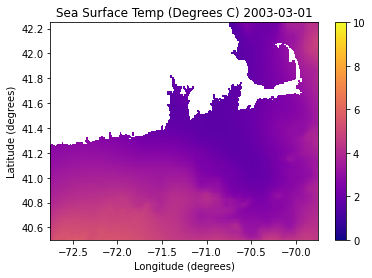

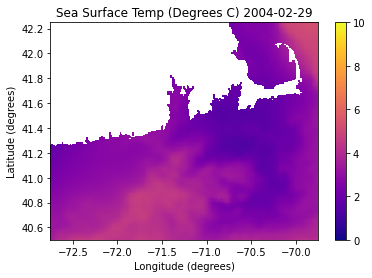

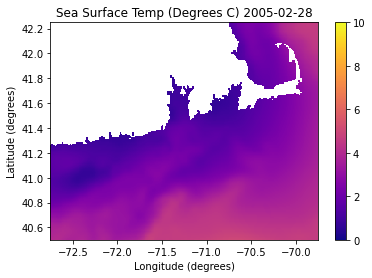

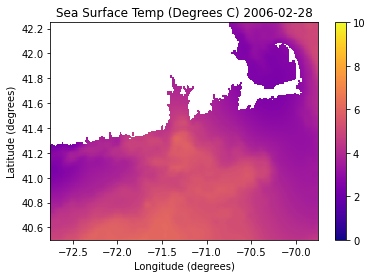

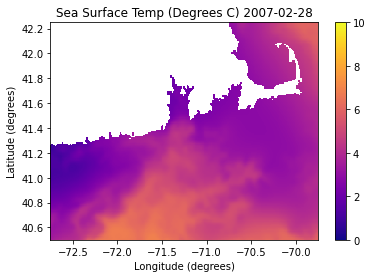

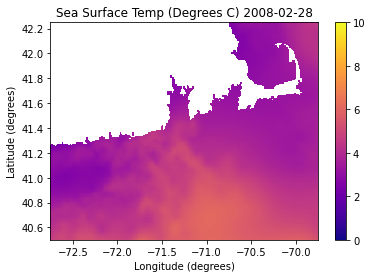

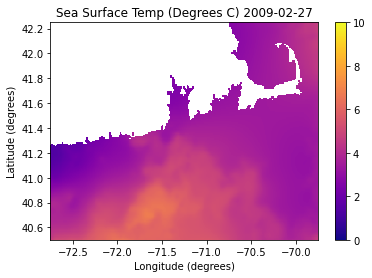

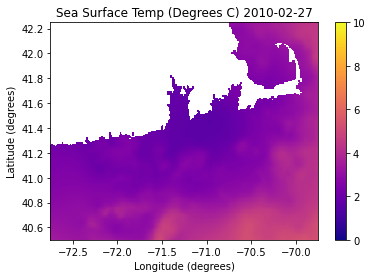

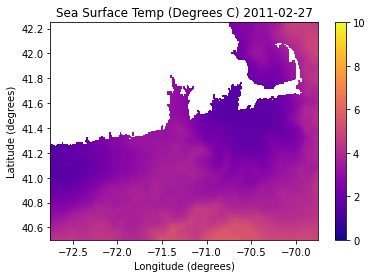

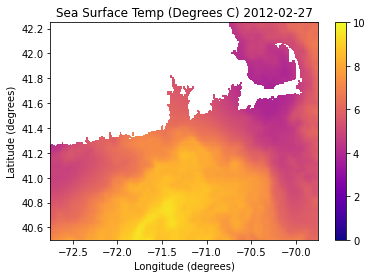

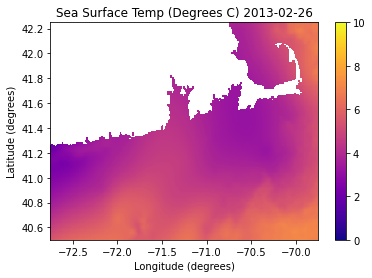

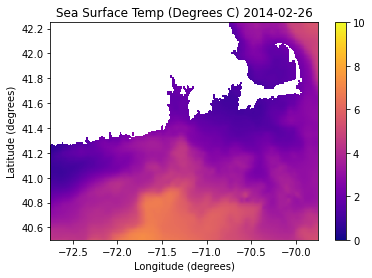

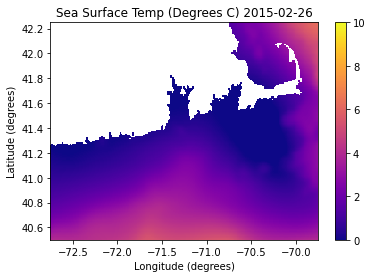

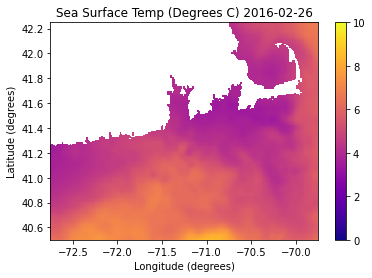

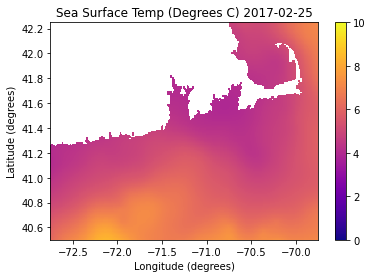

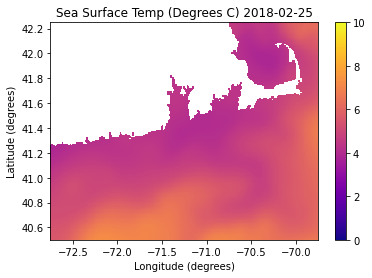

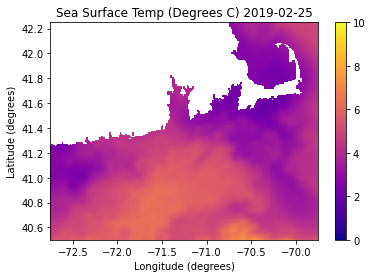

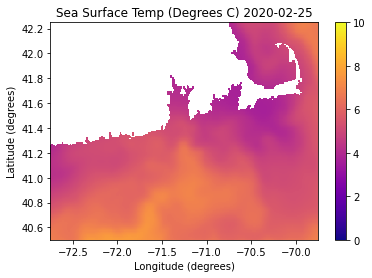

In [2]:
#the code dealing with datetime here is based on code at this link: https://stackoverflow.com/questions/1060279/iterating-through-a-range-of-dates-in-python
#from google.colab import drive
#drive.mount('/content/gdrive')
#images_dir = '/content/gdrive/Shared drives/BFK_BOG/SURF_UG/Benny/Images/jplMURSST41'
import numpy as np
from datetime import date, timedelta
dates2 = []
#making a list of dates:
start_date = date(2003, 3, 1)
end_date = date(2020, 6, 2)
delta = timedelta(days = 365)
while start_date<=end_date:
  dates2.append(str(start_date))
  start_date += delta
def make_url():
  for i in dates2: #looping through the list of dates
    #making the url and opening the dataset:
    url = 'https://pricaimcit.services.brown.edu/erddap/griddap/jplMURSST41.nc?analysed_sst[('+i+'T09:00:00Z):1:('+i+'T09:00:00Z)][(40.5):1:(42.25)][(-72.75):1:(-69.75)]'
    r = requests.get(url, allow_redirects=True)
    open('test.nc', 'wb').write(r.content)
    nc = NetCDFFile('test.nc')
    nc
    #defining some dataset variables:
    lat = nc.variables['latitude'][:]
    lon = nc.variables['longitude'][:]
    time = nc.variables['time'][:]
    sst = nc.variables['analysed_sst'][:]
    plt.figure(i)
    myplot = plt.pcolormesh(lon, lat, sst[0, :, :], cmap = 'plasma', vmin = 0, vmax = 10)
    plt.title('Sea Surface Temp (Degrees C) '+i)
    plt.colorbar()
    plt.xlabel('Longitude (degrees)')
    plt.ylabel('Latitude (degrees)')
    plt.show()
    #plt.savefig(f"{images_dir}/Sea Surface Temp (Daily) "+i+".png")
make_url()